# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Simulacion de valores de X. Generados mediante una Normal(1.5,2.5)
x = 1.5 + 2.5 * np.random.randn(100)

In [5]:
#Errores de media cero
res = 0 + 0.8 * np.random.randn(100)

In [6]:
#Simulacion de Recta teorica que siguen los datos
y_pred = 5 + 0.3 * x

In [7]:
#Simulacion de datos observados
y_act = 5 + 0.3 * x + res

In [8]:
#Convierto todos los vectores a listas para conformar un dataframe mediante libreria pandas
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [9]:
#Construyo dataframe mediante pandas con un diccionario
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [10]:
data.head() # X y Y_actual son las columnas dadas para realizar la regresion lineal,
#Y_prediccion es la recta teorica que ajusta los datos

,x,y_actual,y_prediccion
0,4.040742,6.148448,6.212223
1,-0.040628,5.794331,4.987812
2,1.932011,5.874328,5.579603
3,-0.637822,4.576096,4.808654
4,2.360358,5.404681,5.708107


In [11]:
#Importo libreria para graficar los datos y la recta teorica
import matplotlib.pyplot as plt

In [12]:
#Creo vector de la misma longitud que el vector x, que consiste en la media de x en cada entrada
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

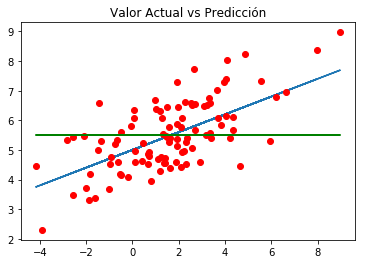

In [13]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"]) #Recta teorica que siguen los datos
plt.plot(data["x"], data["y_actual"], "ro") #Datos dados para analizar (simulados)
plt.plot(data["x"],y_mean, "g") #La media de Y_act, es decir, la media de y observada
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [15]:
#Calcular las medidas descritas arriba. Agragarls como nuevas columnas al dataframe.
y_m = np.mean(y_act)  #Media de los datos, necesaria para calcular las dem´as.
SSR_01 = (data["y_prediccion"]-y_m)**2  #Cuadrados de la regresion:recta teorica que siguen los datos y la media de los datos
SSD_01 = (data["y_prediccion"]-data["y_actual"])**2  #Cuadrados de las diferencias:recta teorica y valores reales
SST_01 = (data["y_actual"]-y_m)**2  #Cuadrados totales: valores reales y la media de tales valores

In [19]:
SSR = sum(SSR_01) #Suma de los cuadrados de la regresion
SSD = sum(SSD_01) #Suma de los cuadrados de las diferencias
SST = sum(SST_01) #Suma de los cuadrados totales

In [20]:
SSR

51.08347658029707

In [21]:
SSD

76.73702132500782

In [22]:
SST

137.3134752708444

In [23]:
SSR+SSD

127.82049790530488

In [24]:
R2 = SSR/SST 

In [25]:
R2 #Coeficiente muy pequeño. El modelo no explica tanta variabilidad de los datos, no se ajusta a ellos 

0.3720208557793567

(array([ 5.,  3., 14., 14.,  8., 19., 19., 11.,  6.,  1.]),
 array([-2.01669889, -1.62033167, -1.22396445, -0.82759723, -0.43123001,
        -0.03486279,  0.36150443,  0.75787166,  1.15423888,  1.5506061 ,
         1.94697332]),
 <a list of 10 Patch objects>)

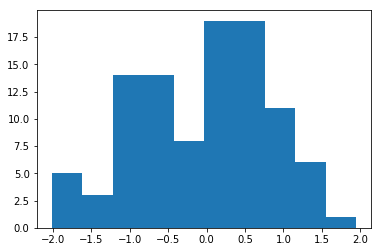

In [26]:
plt.hist(data["y_prediccion"]-data["y_actual"]) 
# Grafica de los errores de la regresion, que se tienen que distribuir de forma normal con media cero para 
#que los datos sean candidatos a regresion lineal. Nosotros generamos los errores mediante una simulaccion normal.

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [27]:
#Voy a calcular los coeficientes alfa y bea de la regresion usando las formulas conocidas
#(las obtuvimos en un capitulo anterior)
#Para esto supongo que solo cuento con los datos simulados de Y(y_actual) y de X.
x_mean = np.mean(data["x"])  #Primero necesito calcular las medias tanto de X como de Y
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.5729804812803467, 5.5105772740108305)

In [28]:
#Calculo el numerador y el denominador del coeficiente beta, pero sin hacer las sumas
beta_n = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
beta_d = (data["x"]-x_mean)**2

In [29]:
#Calculo beta
beta = sum(beta_n)/sum(beta_d)

In [30]:
#Calculo alfa, que requiere a beta 
alpha = y_mean - beta * x_mean

In [31]:
alpha, beta #Muestro los coeficientes obtenidos

(4.993321267849883, 0.32883815935206084)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [32]:
data["y_model"] = alpha + beta * data["x"]

In [33]:
data.head()

,x,y_actual,y_prediccion,y_model
0,4.040742,6.148448,6.212223,6.322071
1,-0.040628,5.794331,4.987812,4.979961
2,1.932011,5.874328,5.579603,5.628640
3,-0.637822,4.576096,4.808654,4.783581
4,2.360358,5.404681,5.708107,5.769497


In [34]:
#Obtengo las medidas de importancia para clcular el coeficiente de determinacion
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [35]:
SSR, SSD, SST

(61.19674337932134, 76.11673189152322, 137.3134752708444)

In [36]:
#Calculo el coeficiente de determinacion
R2 = SSR / SST
R2   #Resulta un poco mayor que el correspondiente al modelo de recta con el que generamos los datos.
#Este modelo de recta se ajusta mejor a los datos

0.44567179775046567

Text(0.5, 1.0, 'Valor Actual vs Predicción')

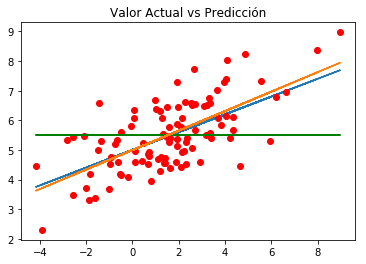

In [37]:
#Grafico la media de los valores.
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"]) #Recta teorica con la que genere los datos
plt.plot(data["x"], data["y_actual"], "ro") #Datos a aplicar la regresion
plt.plot(data["x"],y_mean, "g")          # Media de los datos reales
plt.plot(data["x"], data["y_model"])     # Medelo de regresion obtenido calculando alfa y beta. Arrojo mayor R^2.
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [78]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7991467852623195

In [80]:
np.mean(data["y_actual"])

5.555709335564895

In [81]:
RSE / np.mean(data["y_actual"])

0.14384243973070698